In [26]:
from pid import PID
test_pid = PID(55,2,.3,.3)

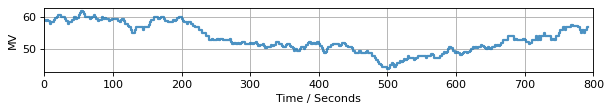

randi -1
measurement 56
move to 56
randi 1
measurement 57
move to 57
randi 0
measurement 57
move to 57
TCLab Model disconnected successfully.


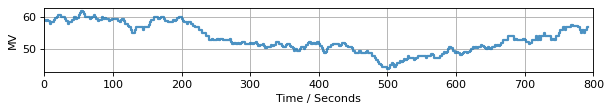

In [27]:
#Test w/ random data
%matplotlib inline
from tclab import clock, setup, Historian, Plotter
import numpy as np
rng = np.random.default_rng(12345)

TCLab = setup(connected=False, speedup=10)

tfinal = 800

with TCLab() as lab:
    h = Historian([('MV', lambda: MV)])
    p = Plotter(h, tfinal)
    prev_pv=60
    for t in clock(tfinal, 2):
        SP = 55
        randi=rng.integers(low=-1,high=2,size=1)[0]
        print("randi "+str(randi))
        PV = prev_pv+randi
        print("measurement "+str(PV))
        MV = test_pid.update(t,PV)   # compute manipulated variable
        print("move to "+str(MV))
        lab.U1 = MV                         # apply 
        p.update(t)                         # update information display
        prev_pv=PV

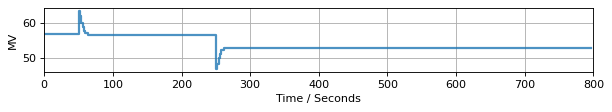

measurement 53.00550436415138
move to 53.00550436415138
TCLab Model disconnected successfully.


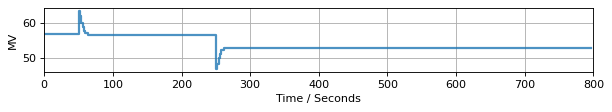

In [28]:
#Test w/ set events
%matplotlib inline
from tclab import clock, setup, Historian, Plotter
import numpy as np

TCLab = setup(connected=False, speedup=10)

tfinal = 800

with TCLab() as lab:
    h = Historian([('MV', lambda: MV)])
    p = Plotter(h, tfinal)
    SP=55
    for t in clock(tfinal, 2):
        if t==50: PV=70
        if t==250:PV=40
        print("measurement "+str(PV))
        MV = test_pid.update(t,PV)   # compute manipulated variable
        PV=MV
        print("move to "+str(MV))
        lab.U1 = MV                         # apply 
        p.update(t)                         # update information display
